In [2]:
import numpy as np
import numpy.random as ran
import userlib.RVgenerator as RVG
import matplotlib.pyplot as plt
import userlib.util as tool
from scipy import stats as st
# import os
import matplotlib as mpl
# from joblib import Parallel, delayed

mpl.rc('legend', loc='best')
mpl.rc('legend', fontsize=13)
mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15)
mpl.rc('axes', titlesize=16)
mpl.rc('axes', labelsize=16) 
mpl.rc('figure', dpi=75)
mpl.rc('figure', figsize=(16,12))
%matplotlib inline


P_min, P_max = 1, 1400
q_min, q_max = 0.1, 1.0
e_min, e_max = 0, 0.9
m1_min, m1_max = 1.0, 10.

dtbl_theta = tool.loadDataTableTheta()

-----------------------------------
DataTable theta(e,phase) is loaded.
-----------------------------------


In [3]:
def getBinaryPopulation(N, epsilon, pi, kappa, eta, epochs):
    print (N, epsilon, pi, kappa, eta, epochs)
    epochs = int(epochs)
    dtajrv_list = []
    for n in range(N):
        j = tool.getOrbitalParameters(pi, kappa, eta)
        P,q,e,m1,i,omega,T0 = j[0], j[1], j[2], j[3], j[4], j[5], j[6]
        deltaTs = RVG.getRandomDeltaTs_0_P(P_max, epochs)#观测时间间隔序列
        phases = RVG.getPhasesByDeltaTs_T0(deltaTs, P, T0)
        phases = np.mod(phases,1)
        rvs = RVG.getRvsByPhases_lookupTable(P*86400., q, e, m1, i, omega, phases, dtbl_theta)
        # print (rvs)
        rvs += ran.normal(0, epsilon, epochs)
        dtajrv_list.append(np.diff(rvs))
        # print (dtajrv_list[-1])
    return np.ndarray.flatten(np.array(dtajrv_list))


def getSingleStarPopulation(N, epsilon, epochs):
    epochs = int(epochs)
    dtajrv_list = []
    for n in range(N):
        deltaTs = RVG.getRandomDeltaTs_0_P(P_max, epochs)#观测时间间隔序列
        rvs = ran.normal(0, epsilon, epochs)
        dtajrv_list.append(np.diff(rvs))
    return np.ndarray.flatten(np.array(dtajrv_list))

In [4]:
if (__name__=='__main__'):
    thesisPicPath = './figures/'
#     sampleSize = np.arange(100,2001,100, dtype=int)
    obstms = np.arange(2,31,1)
    epsilons = [0.5, 1, 2, 4]
    vs_sampleSize = np.arange(200, 2001, 400, dtype=int)#np.arange(400, 2001, 400, dtype=int)
    vs_obstms = np.arange(5, 31, 5, dtype=int)# np.arange(2, 31, dtype=int)
    vs_fbin_true = np.arange(0.1, 1.0, 0.2)
    vs_pi_true = [1.5, 1, 0.5, 0, -0.5, -1.001, -1.5]#
    vs_epsilon = [0.1, 0.5, 1., 2., 4.]
    basicPath = './binary/MockSamples/epsilon(%.02f)/'
    basicBinaryPath = basicPath + 'binary/pi(%.02f)/kappa(%.02f)/eta(%.02f)/'#eta(%.02f)epochs(%02i).npy
    binaryFn = basicBinaryPath + 'binary(2000)epochs(%02i)epsilon(%.02f)P(1,1400)q(0.1,1.0)e(0.0,0.9)m1(1,10)_(%0.2f,%0.2f,%0.2f).npy'
    basicSinglePath = basicPath + 'singleStar/'
    singleFn = basicSinglePath + 'singleStar(2000)epochs(%02i)epsilon(%.02f).npy'

[ 6.90342034  3.38760038 -2.31741967 ... -1.53604561  3.85822842
 -0.86183244]
[ 0.27249856 -3.47093931  2.6922441  ...  1.31785859 -1.71466808
  0.65218207]


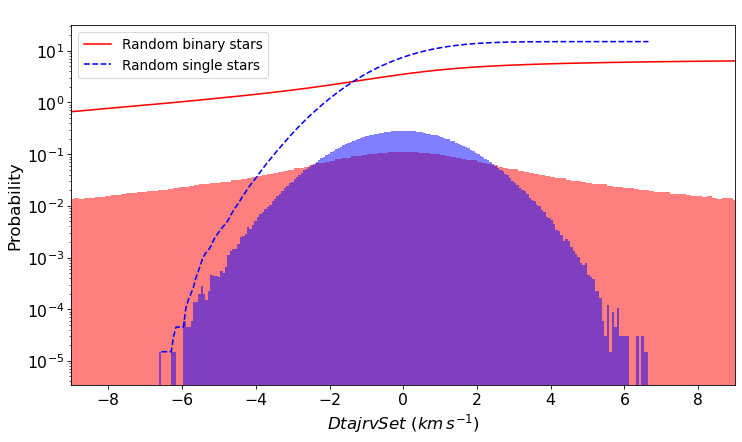

In [ ]:
pi = 0.0
epsilon = 1.
N = 10**5
kappa = 0.
eta = 0.
epochs = 11
# np.seterr(divide='ignore', invalid='ignore')
plt.figure(figsize=(10,6))
# plt.title('epochs=%i,$\epsilon=%.02f$'%(epochs, epsilon))
plt.title('  ')
tmpl_bfn = (basicBinaryPath + 'eta(%.02f)epochs(%02i).npy')%(N, epsilon, pi, kappa, eta, epochs)
if (tool.isFileExisted(tmpl_bfn)):
#     DtajrvList_binary = getBinaryPopulation(N, epsilon, pi, kappa, eta, epochs)
    DtajrvList_binary = np.load(tmpl_bfn)
else:
    DtajrvList_binary = getBinaryPopulation(N, epsilon, pi, kappa, eta, epochs)
    tool.mkdir(basicBinaryPath%(N,epsilon, pi,kappa))
    np.save(tmpl_bfn, DtajrvList_binary)
print (DtajrvList_binary)
n, nums_bin,_ = plt.hist(DtajrvList_binary, bins=5000, density=1, facecolor='r', alpha=0.5)
plt.plot(nums_bin[1:], np.cumsum(n), label='Random binary stars', c='r', alpha=1)

tmpl_sfn = (basicSinglePath + 'epochs(%02i).npy')%(N, epsilon, epochs)
if (tool.isFileExisted(tmpl_sfn)):
#     DtajrvList_single = getSingleStarPopulation(N, epsilon, epochs) 
    DtajrvList_single = np.load(tmpl_sfn)
else:
    DtajrvList_single = getSingleStarPopulation(N, epsilon, epochs) 
    tool.mkdir(basicSinglePath %(N, epsilon))
    np.save(tmpl_sfn, DtajrvList_single)
print (DtajrvList_single)
n, nums_bin,_ = plt.hist(DtajrvList_single, bins=200, density=1, facecolor='b', alpha=0.5)
plt.plot(nums_bin[1:], np.cumsum(n), label='Random single stars', c='b', ls='--', alpha=1)

plt.xlim(-9,9)
plt.yscale('log')
plt.xlabel('$DtajrvList\,\,(km\,s^{-1})$')
plt.ylabel('Probability')
plt.legend()
plt.tight_layout()
plt.savefig(thesisPicPath + 'DtajrvList_cdf_BS_APJ_version.pdf')
plt.show()
plt.close()


100000 0.0 0.0 0.0 1.0 2
100000 0.0 0.0 0.0 1.0 15
100000 0.0 0.0 0.0 1.0 30


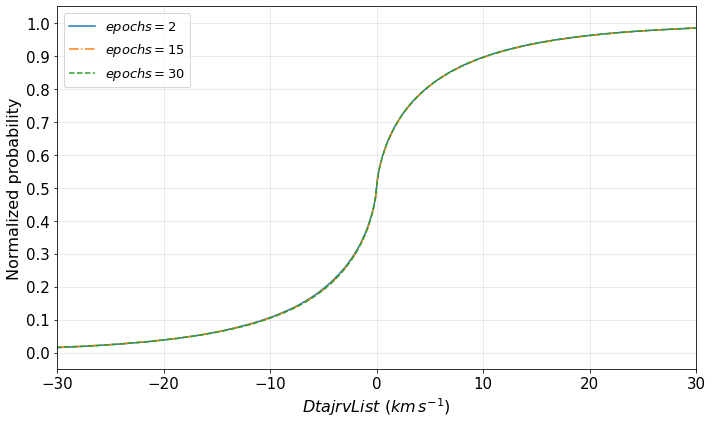

7370


In [7]:
pi, kappa, eta = 0., 0., 0.
epsilon = 1.
N = 10**5
plt.figure(figsize=(10,6))
# plt.title('Binaries. $\epsilon=%.02f$'%(epsilon))
# plt.title('Single stars. $\epsilon=%.02f$'%epsilon)
nums_bin = np.arange(-1000, 1000 + 0.1, 0.1)
# sets = []
lss = ['-','-.','--']
lws = [1.5, 1.5, 1.5]
epochs = [2,15,30]
for epoch,t in zip(epochs, range(len(epochs))):
    DtajrvList = getBinaryPopulation(N, pi, kappa, eta, epsilon, epoch)
#         DtajrvList = getSingleStarPopulation(N, epsilon, epoch)
#         sets.append(DtajrvList)
    n, nums_bin = np.histogram(DtajrvList, bins=nums_bin, density=1)
    n /= sum(n)
    # sets.append(np.cumsum(n))
    labelstr = '$epochs=%i$'%(epoch)
    plt.plot(nums_bin[1:], np.cumsum(n), ls=lss[t], lw=lws[t], label=labelstr)
# print (round(np.mean(sets[1]-sets[0]),8))
# print (round(np.mean(sets[1]-sets[2]),8))
# print (round(np.mean(sets[2]-sets[0]),8))
plt.xlim(-30, 30)
plt.yticks(np.arange(0,1.1,0.1))
plt.grid(alpha=0.3)
plt.xlabel('$DtajrvList\,\,(km\,s^{-1})$')
plt.ylabel('Normalized probability')
plt.legend()
plt.tight_layout()
# 1.35e-05 (1,0)
# 1.37e-05 (2,0)
# -3e-07 (1,2)
plt.savefig(thesisPicPath + 'DtajrvList_binary_cdf_epoch(2,15,30).pdf')
plt.show()
plt.close()
tool.collect()

100000 0.1 0.0 0.0 0.0 11
100000 0.5 0.0 0.0 0.0 11
100000 1 0.0 0.0 0.0 11
100000 2 0.0 0.0 0.0 11
100000 4 0.0 0.0 0.0 11
-1.07831887
0.05325363
-1.1315725


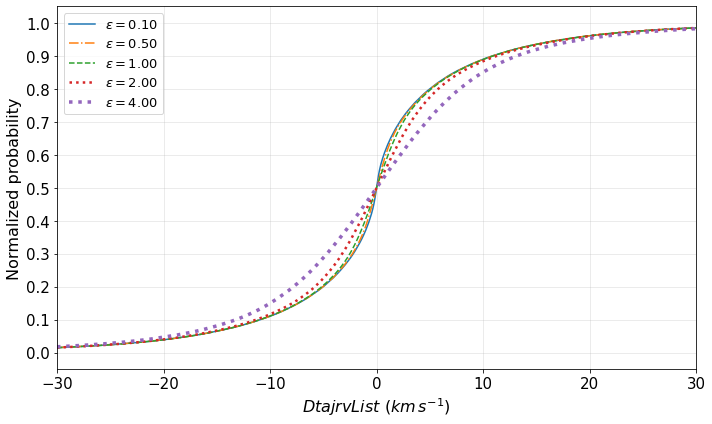

8155


In [5]:
pi, kappa, eta = 0., 0., 0.
epochs = 11
N = 10**5
plt.figure(figsize=(10,6))
nums_bin = np.arange(-100 , 100 + 0.01, 0.01)
# plt.title('Binaries. epochs=%i'%(epoch))
# plt.title('Single stars. epochs=%i'%epoch)
sets = []
count = 0 
eps = [0.1, 0.5, 1, 2, 4]
lss = ['-','-.','--',':',':']
lws = [1.5, 1.5, 1.5, 2.5, 3.5]
for epsilon,t in zip(eps, range(len(eps))):
    DtajrvList = getBinaryPopulation(N, epsilon, pi, kappa, eta, epochs)
    # DtajrvList = getSingleStarPopulation(N, epsilon, epochs)
    n, nums_bin = np.histogram(DtajrvList, bins=nums_bin, density=1)
    n /= sum(n)
    sets.append(np.cumsum(n))
    labelstr = '$\epsilon=%.02f$'%(epsilon)
    plt.plot(nums_bin[1:], np.cumsum(n), ls=lss[t], lw=lws[t], label=labelstr)# 
print (round(np.sum(sets[1]-sets[0]),8))
print (round(np.sum(sets[1]-sets[2]),8))
print (round(np.sum(sets[2]-sets[0]),8))
plt.xlim(-30,30)
plt.yticks(np.arange(0,1.1,0.1))
plt.grid(alpha=0.3)
plt.xlabel('$DtajrvList\,\,(km\,s^{-1})$')
plt.ylabel('Normalized probability')
plt.legend()
plt.tight_layout()
plt.savefig(thesisPicPath + 'DtajrvList_binary_cdf_epsilon(0.1,0.5,1,2,4).pdf')
# plt.savefig(thesisPicPath + 'DtajrvList_single_cdf_epsilon(0.1,0.5,1,2,4).pdf')
plt.show()
plt.close()
tool.collect()


100000 1.0 -1.5 0.0 0.0 11
100000 1.0 -1.001 0.0 0.0 11
100000 1.0 0.5 0.0 0.0 11


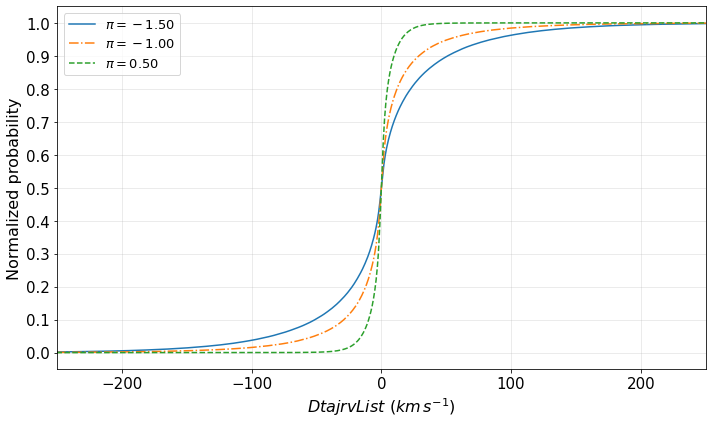

6313


In [34]:
epsilon = 1.
epochs = 11
N = 10**5
kappa = 0.
eta = 0.
plt.figure(figsize=(10,6))
# plt.title('Binaries. epochs=%i,$\epsilon=%.02f$'%(epochs, epsilon))
nums_bin = np.arange(-1000 , 1000 + 0.5, 0.5)
lss = ['-','-.','--',':',':']
lws = [1.5, 1.5, 1.5, 2, 4]
pis = [-1.5, -1.001, 0.5]
for pi,t in zip(pis, range(len(pis))):
    DtajrvList = getBinaryPopulation(N, epsilon, pi, kappa, eta, epochs)
    n, nums_bin = np.histogram(DtajrvList, bins=nums_bin, density=1)
    n /= sum(n)
    plt.plot(nums_bin[1:], np.cumsum(n), ls=lss[t], lw=lws[t], label='$\pi=%.02f$'%pi)
plt.xlim(-250,250)
plt.yticks(np.arange(0,1.1,0.1))
plt.grid(alpha=0.3)
plt.xlabel('$DtajrvList\,\,(km\,s^{-1})$')
plt.ylabel('Normalized probability')
plt.legend()
plt.tight_layout()
plt.savefig(thesisPicPath + 'DtajrvList_cdf_pi(-1.5,-0.5,0.5).pdf')
plt.show()
plt.close()
tool.collect()


2.0 1.6 1.0 0.7 70000 30000
70000 1.0 2.0 1.6 1.0 11
-0.5 0.4 -1.001 0.3 30000 70000
30000 1.0 -0.5 0.4 -1.001 11
0.5 -1.2 0.0 0.1 10000 90000
10000 1.0 0.5 -1.2 0.0 11


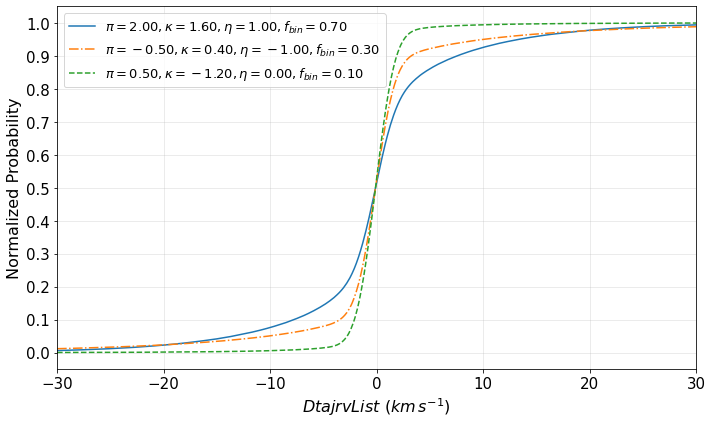

In [16]:
epsilon = 1.
N = 10**5
epochs = 11
plt.figure(figsize=(10,6))
# plt.title('Binaries. epochs=%i,$\epsilon=%.02f$'%(epochs, epsilon))
# plt.title(' ')
nums_bin = np.arange(-100 , 100 + 0.1, 0.1)
params = [[2., 1.6, 1.0, 0.7],
        [-0.5, 0.4, -1.001, 0.3],
        [0.5, -1.2, 0., 0.1],
        ]
params = np.array(params)
lss = ['-','-.','--',':',':']
lws = [1.5, 1.5, 1.5, 2, 3.5]
count = 0
for pi, kappa, eta, fbin in params:
    print (pi, kappa, eta, fbin, int(N*fbin), int(N*(1-fbin)))
    DtajrvList_binary = getBinaryPopulation(int(N*fbin), epsilon, pi, kappa, eta, epochs)
    DtajrvList_single = getSingleStarPopulation(int(N*(1-fbin)), epsilon, epochs)
    DtajrvList  = np.r_[DtajrvList_binary, DtajrvList_single]
    n, nums_bin = np.histogram(DtajrvList, bins=nums_bin, density=1)
    Y = np.float64(np.cumsum(n))
    Y /= max(Y)
    plt.plot(nums_bin[:-1], Y, lw=lws[count], ls=lss[count], label='$\pi=%.02f, \kappa=%.02f, \eta=%.02f, f_{bin}=%.02f$'%(pi, kappa, eta, fbin))# , f_{bin}=%.02f
    count += 1
plt.xlim(-30,30)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(alpha=0.3)
plt.xlabel('$DtajrvList\,\,(km\,s^{-1})$')
plt.ylabel('Normalized Probability')
plt.legend()
plt.tight_layout()
# plt.savefig(thesisPicPath + 'DtajrvList_cdf_binaries_diff_pi_kappa_eta.pdf')
plt.savefig(thesisPicPath + 'DtajrvList_cdf_binaries_diff_pi_kappa_eta_fbin.pdf')
plt.show()
plt.close()
